## 다중선형 회귀모형 시각화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
np.random.seed(seed = 1)
n = 500
x1 = pd.Series(data = np.random.randn(n) * 10)
x2 = pd.Series(data = np.random.randn(n) * 8.5) - 3
y = pd.Series(data = 3 * x1 + 1.5 * x2 - 15 + np.random.randn(n) * 5)

In [3]:
df = pd.DataFrame(data = {'X1': x1, 'X2': x2, 'Y': y})
df.describe()

,X1,X2,Y
count,500.000000,500.000000,500.000000
mean,0.534369,-2.794402,-17.199537
std,9.893982,8.281540,32.966150
min,-27.930850,-28.956997,-104.949989
25%,-6.175308,-8.037796,-38.844130
50%,0.387869,-2.619909,-16.890388
75%,7.409284,2.774526,5.358800
max,30.308571,30.648123,102.646924


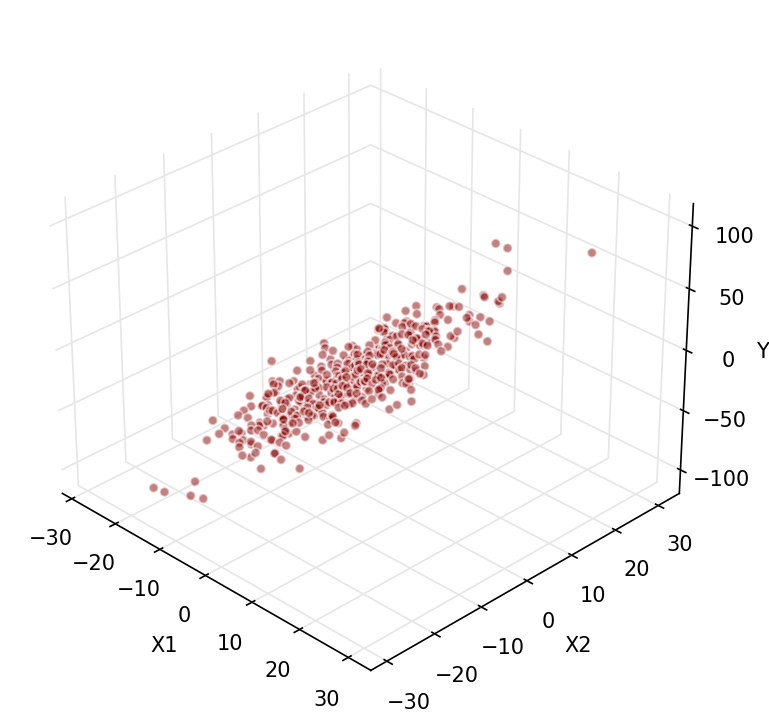

In [4]:
fig = plt.figure(figsize = (10, 6), dpi = 150)
ax1 = fig.add_subplot(projection = '3d')

ax1.xaxis.set_pane_color(color = (1.0, 1.0, 1.0, 0.0))
ax1.yaxis.set_pane_color(color = (1.0, 1.0, 1.0, 0.0))
ax1.zaxis.set_pane_color(color = (1.0, 1.0, 1.0, 0.0))

ax1.scatter(df['X1'], df['X2'], df['Y'], marker = 'o', 
            color = 'darkred', ec = '1', s = 20, alpha = 0.5)
ax1.set_xlabel(xlabel = 'X1')
ax1.set_ylabel(ylabel = 'X2')
ax1.set_zlabel(zlabel = 'Y', labelpad = 0)

ax1.view_init(elev = 30, azim = -45)
ax1.xaxis._axinfo['grid']['color'] = '0.9'
ax1.yaxis._axinfo['grid']['color'] = '0.9'
ax1.zaxis._axinfo['grid']['color'] = '0.9';

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model = LinearRegression()

In [7]:
model.fit(X = df[['X1', 'X2']], y = df['Y'] )

LinearRegression()

In [8]:
model.coef_

array([3.00990833, 1.51390806])

In [9]:
model.intercept_

-14.577471106605142

In [10]:
b0 = model.intercept_
b1 = model.coef_[0]
b2 = model.coef_[1]

In [11]:
df['P'] = b0 + b1 * df['X1'] + b2 * df['X2']

In [12]:
df['GB'] = np.where(df['Y'].ge(df['P']), 'U', 'D')

In [13]:
df

,X1,X2,Y,P,GB
0,16.243454,-17.614853,6.541901,7.646567,D
1,-6.117564,-2.514472,-49.286942,-36.797457,D
2,-5.281718,-9.796154,-42.999461,-45.305433,U
3,-10.729686,-5.478554,-57.027051,-55.166870,D
4,8.654076,-5.201354,-4.395186,3.596133,D
...,...,...,...,...,...
495,-8.286280,-3.989775,-44.860276,-45.558567,U
496,5.288797,-22.357033,-35.832108,-32.505168,D
497,-22.370865,-3.591809,-88.549543,-87.349392,D
498,-11.077125,0.007899,-38.733724,-47.906644,U


In [14]:
X1 = np.tile(A = np.arange(-30, 30), reps = (60, 1))
X2 = np.tile(A = np.arange(-30, 30), reps = (60, 1)).T
Y = b0 + b1 * X1 + b2 * X2

In [15]:
df1 = df[df['GB'].eq('U')]
df2 = df[df['GB'].eq('D')]

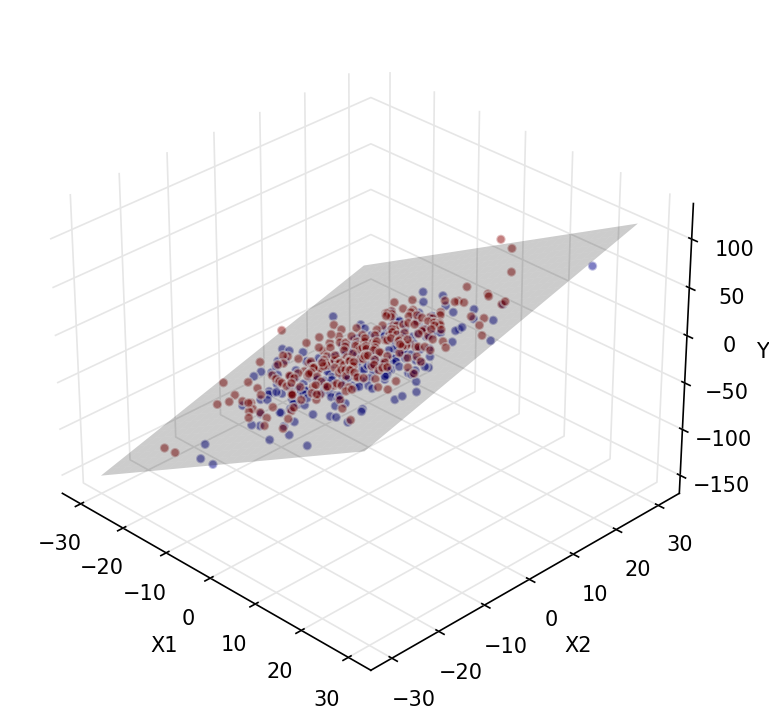

In [16]:
fig = plt.figure(figsize = (10, 6), dpi = 150)
ax1 = fig.add_subplot(projection = '3d')

ax1.xaxis.set_pane_color(color = (1.0, 1.0, 1.0, 0.0))
ax1.yaxis.set_pane_color(color = (1.0, 1.0, 1.0, 0.0))
ax1.zaxis.set_pane_color(color = (1.0, 1.0, 1.0, 0.0))

ax1.scatter(df1['X1'], df1['X2'], df1['Y'], marker = 'o', 
            color = 'darkred', ec = '1', s = 20, alpha = 0.5)
ax1.scatter(df2['X1'], df2['X2'], df2['Y'], marker = 'o', 
            color = 'darkblue', ec = '1', s = 20, alpha = 0.5)

ax1.set_xlabel(xlabel = 'X1')
ax1.set_ylabel(ylabel = 'X2')
ax1.set_zlabel(zlabel = 'Y', labelpad = 0)

ax1.plot_surface(X = X1, Y = X2, Z = Y, color = '0', alpha = 0.2)

ax1.view_init(elev = 30, azim = -45)
ax1.xaxis._axinfo['grid']['color'] = '0.9'
ax1.yaxis._axinfo['grid']['color'] = '0.9'
ax1.zaxis._axinfo['grid']['color'] = '0.9';

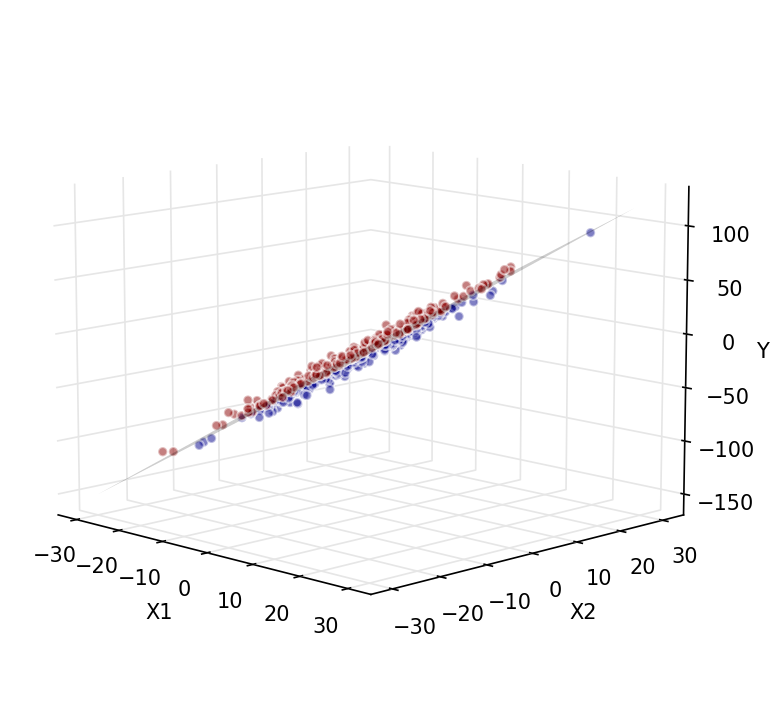

In [17]:
fig = plt.figure(figsize = (10, 6), dpi = 150)
ax1 = fig.add_subplot(projection = '3d')

ax1.xaxis.set_pane_color(color = (1.0, 1.0, 1.0, 0.0))
ax1.yaxis.set_pane_color(color = (1.0, 1.0, 1.0, 0.0))
ax1.zaxis.set_pane_color(color = (1.0, 1.0, 1.0, 0.0))

ax1.scatter(df1['X1'], df1['X2'], df1['Y'], marker = 'o', 
            color = 'darkred', ec = '1', s = 20, alpha = 0.5)
ax1.scatter(df2['X1'], df2['X2'], df2['Y'], marker = 'o', 
            color = 'darkblue', ec = '1', s = 20, alpha = 0.5)

ax1.set_xlabel(xlabel = 'X1')
ax1.set_ylabel(ylabel = 'X2')
ax1.set_zlabel(zlabel = 'Y', labelpad = 0)

ax1.plot_surface(X = X1, Y = X2, Z = Y, color = '0', alpha = 0.2)

ax1.view_init(elev = 11, azim = -45)
ax1.xaxis._axinfo['grid']['color'] = '0.9'
ax1.yaxis._axinfo['grid']['color'] = '0.9'
ax1.zaxis._axinfo['grid']['color'] = '0.9';